# Simulation math les 4 - Sir en Seir

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## SIR Model
- S is het aantal personen dat besmet kan worden
- I is het aantal geinfecteerde (en dus besmettelijke personen)
- R is het aantal herstelde personen.

- hoeveel contacten heeft een besmet persoon per dag (a = 25)
- wat is de kans dat je de ziekte overdraagt (p = 0.02)
- kans dat degene die je tegenkomt, besmet kan worden S(t)/N waarbij N is de totale bevolking.

De bijbehorende differentiaalvergelijkingen zijn:
$$ \frac{dS}{dt} = -\beta \cdot I(t) S(t)$$
$$ \frac{dI}{dt} = \beta \cdot I(t) S(t) - \frac{1}{d} I(t)$$
$$ \frac{dR}{dt} = \frac{1}{d} I(t)$$

Hierbij is $d$ het aantal dagen dat de ziekte (en de besmettelijke periode) duurt. $\beta$ is de transmissiecoeffienct, die je kunt berekenen met  $\beta = p \cdot a \cdot  \frac{1}{N}$waarbij:
- $a$ is het aantal contacten per persoon per dag,
- $p$ is de kans op besmetting bij een contact
- $N$ is de totate populatie.


De formules voor het berekenen van de volgende stap in Forward Euler zijn de volgende:
$$S(t+h) = S(t) + h \cdot -\beta \cdot I(t) S(t)$$
$$I(t+h) = I(t) + h \left(\beta \cdot I(t) S(t) - \frac{1}{d} I(t)\right)$$
$$R(t+h) = R(t) + h \cdot \frac{1}{d} \cdot I(t)$$
met $\beta = 5 \times 10^{-9}$ in dit voorbeeld. In het algemeen geldt: $\beta = p \cdot a \cdot  \frac{1}{N}$ met $a$ is het aantal contacten per persoon per dag, $p$ is de kans op besmetting bij een contact en $N$ is de totate populatie.

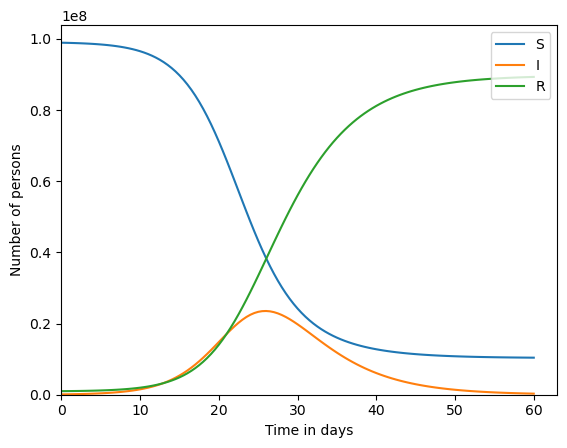

In [8]:
h = 0.5 # days
transmission_coeff = 5e-9 # 
infectious_time = 5. # days

end_time = 60.0 # days
num_steps = int(end_time / h)
times = h * np.array(range(num_steps + 1))

def sir_model():

    s = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    r = np.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    i[0] = 1e5
    r[0] = 1e6

    ### TODO: Insert Forward Euler Method here
    for step in range(num_steps):
        s[step+1] = s[step] + h* (- transmission_coeff * i[step] * s[step])
        i[step+1] = i[step] + h * (-1/infectious_time * i[step] + transmission_coeff * i[step] * s[step])
        r[step+1] = r[step] + h * (1/infectious_time * i[step])
    return s, i, r

s, i, r = sir_model()

def plot_me():
    s_plot = plt.plot(times, s, label='S')
    i_plot = plt.plot(times, i, label='I')
    r_plot = plt.plot(times, r, label='R')
    plt.legend(('S', 'I', 'R'), loc='upper right')

    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(xmin=0.)
    plt.ylim(ymin=0.)
    plt.show()

plot_me()

## Programmeren van SEIR

## SEIR Model
- Uitbreiding op SIR
- Het aantal personen dat bij SIR in het I-compartement zat wordt opgedeeld in:
  - Exposed (besmet maar nog niet ziek of besmettelijk, dit duurt $l$ dagen)
  - Infectious (ziek / besmettelijk), dit duurt $d$ dagen.
  - Nu 'stroomt' het van S, naar E, naar I, naar R.

De formules voor het berekenen van de volgende stap in Forward Euler zijn de volgende:
$$S(t+h) = S(t) + h \cdot -\beta \cdot I(t) S(t)$$
$$E(t+h) = E(t) + h \left(\beta \cdot I(t) S(t) - \frac{1}{l} E(t)\right)$$
$$I(t+h) = I(t) + h \cdot \left(\frac{1}{l}\cdot E(t) - \frac{1}{d} I(t)\right)$$
$$R(t+h) = R(t) + h \cdot \frac{1}{d} I(t)$$
met $\beta = 5 \times 10^{-9}$ in dit voorbeeld. In het algemeen geldt:  $\beta = p \cdot a \cdot  \frac{1}{N}$ met $a$ is het aantal contacten per persoon per dag, $p$ is de kans op besmetting bij een contact en $N$ is de totate populatie.

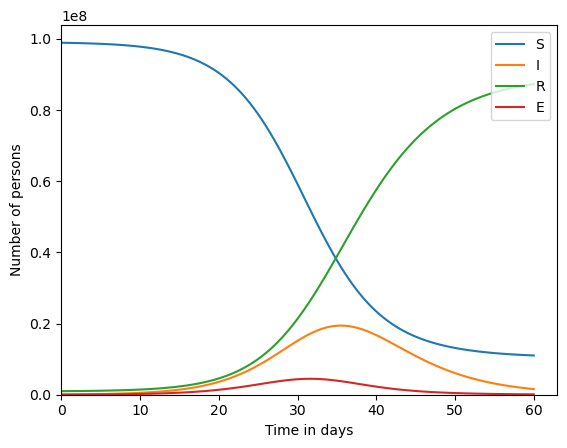

In [15]:
h = 0.5 # days
transmission_coeff = 5e-9 # 1 / day person
infectious_time = 5. # days
latency = 1

end_time = 60.0 # days
num_steps = int(end_time / h)
times = h * np.array(range(num_steps + 1))

def seir_model():

    s = np.zeros(num_steps + 1)
    i = np.zeros(num_steps + 1)
    r = np.zeros(num_steps + 1)
    e = np.zeros(num_steps + 1)

    s[0] = 1e8 - 1e6 - 1e5
    i[0] = 1e5
    r[0] = 1e6
    e[0] = 0

    ### TODO: Insert Forward Euler Method here
    for step in range(num_steps):
        s[step+1] = s[step] + h * (- transmission_coeff * i[step] * s[step])
        e[step+1] = e[step] + h * (transmission_coeff * i[step] * s[step] - 1/latency * e[step])
        i[step+1] = i[step] + h * (1/latency * e[step]-1/infectious_time * i[step])
        r[step+1] = r[step] + h * (1/infectious_time * i[step])
    return s, e, i, r

s, e, i, r = seir_model()

def plot_me():
    s_plot = plt.plot(times, s, label='S')
    i_plot = plt.plot(times, i, label='I')
    r_plot = plt.plot(times, r, label='R')
    e_plot = plt.plot(times, e, label='E')
    plt.legend(loc='upper right')

    axes = plt.gca()
    axes.set_xlabel('Time in days')
    axes.set_ylabel('Number of persons')
    plt.xlim(xmin=0.)
    plt.ylim(ymin=0.)
    plt.show()

plot_me()

## Zouttank

Komt volgende les